<a href="https://colab.research.google.com/github/NabilBADRI/Multidialect-Project/blob/main/NLP_fasttext_Aravec_BiGRU_Embedding_LEBANESE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEBENESE Dataset

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/dataset3and4.xlsx')
# test=pd.read_excel('/content/drive/MyDrive/kaggle-nabil-badri/Text Classification Notebooks/BI-GRU/MyArticle-dataset-arabe/dataset1and2.xlsx')
label=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/dataset3and4.xlsx',header=None).iloc[:,-1]
#OFF=0 
#NOT=1

In [ ]:
train['word_count'] = train['commentaire'].apply(lambda x : len(x.split()))
train

,Unnamed: 0,commentaire,classe,word_count
0,0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive,17
1,1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal,15
2,2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal,20
3,3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,6
4,4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive,9
...,...,...,...,...
9191,3348,يمشي بخطا ادارتها قيد من الأمريكان ونهب اسرائ...,hate,20
9192,3349,مهما حصل هندوس عليهم شويه الرويبضه بس نخلص ال...,hate,11
9193,3350,الكلب لا يعض اذن اخوه كذابين خنازير,hate,7
9194,3351,لأنه صغير ويكتب في قناة خنازير فلن نقرأ مقاله.,hate,9


In [ ]:
# #Encoding
# df.label.replace({'normal':0,'abusive':1,'spam':2,'hateful':3},inplace=True)
# df.head()

In [ ]:
train[train['word_count'] == 30]

,Unnamed: 0,commentaire,classe,word_count
777,777,بغل بني عثمان بيعتقل صحافيين متل بوتين وأوربان...,abusive,30
3591,3591,بغض النظر عن إنه كلهن كلاب بس حتى الإمارات وصل...,abusive,30
4645,4645,صار كل كلب عوني بدو ينشهر على تويتر بيتطاول ع...,hate,30
4997,4997,اه يا فاشل افتخر ولا يهمك لأنك انسان انتهازي ح...,abusive,30
5038,5038,يا بغل العلم الي حضرتك حاطه هو علم تركيا يا طش...,hate,30
5122,5122,يا فهمان يا مقاوم حرر القدس وشو بدك بل الخزعبل...,normal,30
5225,5225,مارسيل غانم انتحر إعلامياً للتو ظهر عن طريق ال...,hate,30
5743,5743,جابتله سيرة الطاقة النووية بالغلط بلش يشرح ليه...,normal,30


In [ ]:
train['commentaire'][3335]

'لازم يغَيرولا إسما من وزارة الطاقة ل وزارة كان بدنا ننجز بس ما خلّونا'

In [ ]:
y_train=train['classe']
X_train=train['commentaire']
#test=test['comm']
y_train=pd.factorize(y_train)[0]
# y_test=pd.factorize(y_test)[0]
train['labels'] = pd.factorize(y_train)[0]

import collections
collections.Counter(y_train)

#Counter({0: 4400, 1: 8840})

Counter({0: 1746, 1: 4565, 2: 2885})

In [ ]:
train

,Unnamed: 0,commentaire,classe,word_count,labels
0,0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive,17,0
1,1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal,15,1
2,2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal,20,1
3,3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,6,0
4,4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive,9,0
...,...,...,...,...,...
9191,3348,يمشي بخطا ادارتها قيد من الأمريكان ونهب اسرائ...,hate,20,2
9192,3349,مهما حصل هندوس عليهم شويه الرويبضه بس نخلص ال...,hate,11,2
9193,3350,الكلب لا يعض اذن اخوه كذابين خنازير,hate,7,2
9194,3351,لأنه صغير ويكتب في قناة خنازير فلن نقرأ مقاله.,hate,9,2


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning data
import re
from nltk.stem.porter import PorterStemmer
tokenizer=nltk.tokenize.WhitespaceTokenizer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
def preprocess(review):
   review = re.sub('[^ا-ي]', ' ', review)
 
   review = tokenizer.tokenize(review)
   review = [ar_stemmer.stemWord(word) for word in review if not word in set(stopwords_list )]
   review = ' '.join(review)
   return review

In [ ]:
# X_train = train['commentaire'].apply(preprocess)
X_train = X_train.apply(preprocess)


In [ ]:
X_train[0] ### Après preprocessing

'وزير جبران باسيل تاج راس جربان ممنوع يوم مساس مقدسا ربنا وال يسوع مسيح'

In [ ]:
train['commentaire'][0] ### Originale

'الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح'

In [ ]:
# x=train[323].lower().replace('@user','').replace('url','')
# x=re.sub('[^A-Za-z]', ' ', x)
# re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x)

In [ ]:
# # Creating the training corpus
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()
# corpus_train = []
# for i in train:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_train.append(x)    
# # Creating the training corpus
# corpus_test = []
# for i in test:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_test.append(x) 

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# max_words = 5000 #frequency of words to be kept
# max_len = 200
# tokenize = Tokenizer(num_words=max_words)
# tokenize.fit_on_texts(corpus_train)
# sequences = tokenize.texts_to_sequences(corpus_train)
# word_index = tokenize.word_index
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
# splitting the data into target and feature
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train ,test_size = 0.1, random_state=0)
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 
vocab_size # Adding 1 because of reserved 0 index

15289

In [ ]:
word_index = tokenizer.word_index


In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)
print('Max len:', maxlen)

Max len: 46


In [ ]:
# len(x.split())

# lens_train = [len(i.split()) for i in list(train['commentaire'])]
# lens_test = [len(i.split()) for i in X_test]
# lens = lens_train + lens_test

# maxlen_ = np.max(train['word_count'])
# print('Max len:', maxlen_)


In [ ]:
# num_words = min(max_words, len(word_index)) + 1
# print(num_words)

In [ ]:
### AraVec embeddings
#!wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip

In [ ]:
### FastText Arabic embeddings
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz

In [ ]:
### Unzip AraVec 
#!unzip /content/full_grams_cbow_300_twitter.zip

In [ ]:
### Unzip FastText Arabic
#!gzip -d /content/cc.ar.300.vec.gz

In [ ]:
embedding_path1 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/cc.ar.300.vec" ### FadText Arabic
embedding_path2 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec
embed_size = 300

In [ ]:
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
fasttext_arabic_emb = build_matrix(embedding_path1, word_index)
# aravec_emb = build_matrix(embedding_path2, word_index)

In [ ]:
fasttext_arabic_emb.shape

(15290, 300)

In [ ]:
import gensim

t_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl')

In [ ]:
# word_vector = t_model.wv[ token ]

def build_aravec_matrix(embedding_path, word_index):

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        try:
          embedding_vector = t_model.wv[word]
        except KeyError:
          continue
        if embedding_vector is not None:
            embedding_matrix[i] = t_model.wv[word]
    return embedding_matrix

In [ ]:
aravec_emb = build_aravec_matrix(embedding_path2, word_index)

In [ ]:
aravec_emb.shape

(15290, 300)

In [ ]:
aravec_emb

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14556547,  0.42558247,  0.31349891, ...,  0.99427533,
        -0.72583079,  2.37648702],
       [-0.38673455,  0.33680117,  1.18331623, ..., -0.91360921,
        -1.73035276,  0.03432675],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

ccombinaison des deux embedding


In [ ]:
embedding_matrix2=np.mean((fasttext_arabic_emb, aravec_emb),axis=0)
embedding_matrix2.shape

(15290, 300)

In [ ]:
from keras.preprocessing import sequence

# test_sequences = tokenize.texts_to_sequences(corpus_test)
X_train_pad = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test_pad  = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
from keras import backend as K
def f1(y_true, y_pred):
    
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
callbacks = keras.callbacks.EarlyStopping(monitor='val_f1', mode='max', verbose=1,
                                          patience=8,restore_best_weights = True)

In [ ]:
from keras.models import Sequential,Model
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Embedding,Dense,GRU
from keras.layers import Dropout,Bidirectional,GlobalMaxPool1D,GlobalAveragePooling1D
from keras.layers import SpatialDropout1D,concatenate,Input
# from keras.optimizers import RMSprop
from keras.initializers import Constant
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights=dict(enumerate(class_weights))

# BIGRUs Model

### Training a model with Aravec and Fasttext embedding


In [ ]:
inp=Input((maxlen,))
#Embedding Layer 
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(embedding_matrix2),
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
#GRU Bidrirectionnel
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])

 
x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(out)

out=Dense(3, activation="softmax")(out)

model=Model(inp,out)

mcp_save = ModelCheckpoint('model.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)



In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 46, 300)      4587000     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 46, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 46, 300)      406800      ['spatial_dropout1d[0][0]']  

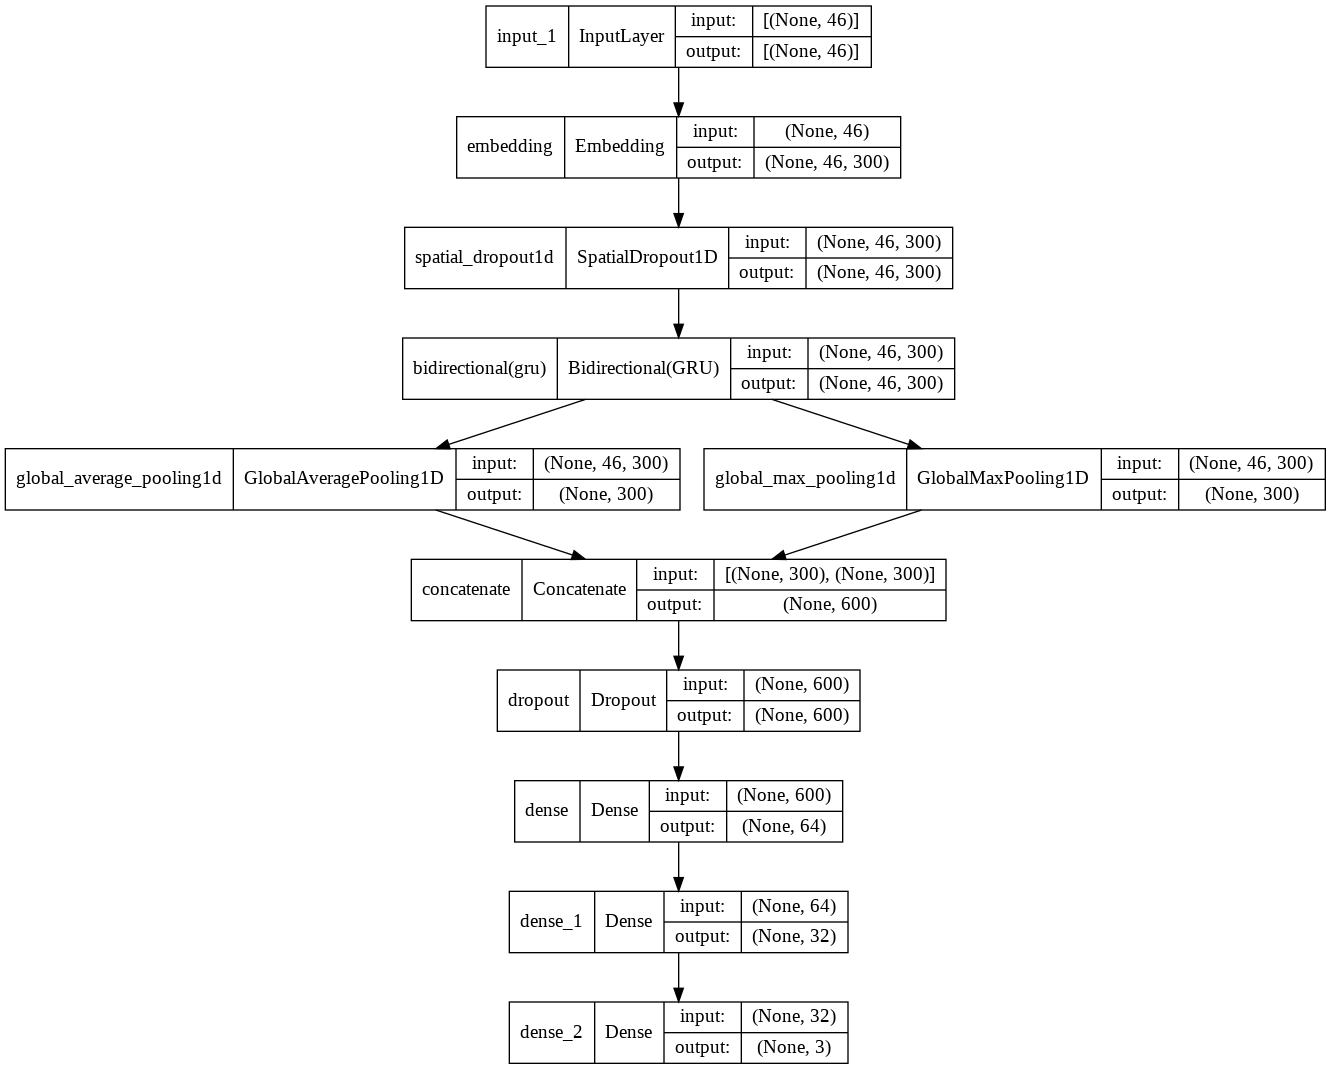

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=30, verbose=1, class_weight=class_weights,
          validation_split = 0.2, callbacks=[callbacks])

Epoch 1/30
52/52 [==============================] - 12s 65ms/step - loss: 0.8502 - f1: 0.4823 - val_loss: 0.8129 - val_f1: 0.5602
Epoch 2/30
52/52 [==============================] - 2s 42ms/step - loss: 0.6958 - f1: 0.6386 - val_loss: 0.6258 - val_f1: 0.7401
Epoch 3/30
52/52 [==============================] - 2s 42ms/step - loss: 0.4035 - f1: 0.8400 - val_loss: 0.7108 - val_f1: 0.7169
Epoch 4/30
52/52 [==============================] - 2s 42ms/step - loss: 0.1745 - f1: 0.9319 - val_loss: 0.7841 - val_f1: 0.7377
Epoch 5/30
52/52 [==============================] - 2s 42ms/step - loss: 0.0854 - f1: 0.9685 - val_loss: 0.9872 - val_f1: 0.7203
Epoch 6/30
52/52 [==============================] - 2s 42ms/step - loss: 0.0451 - f1: 0.9850 - val_loss: 1.0573 - val_f1: 0.7217
Epoch 7/30
52/52 [==============================] - 2s 42ms/step - loss: 0.0261 - f1: 0.9915 - val_loss: 1.2165 - val_f1: 0.7139
Epoch 8/30
52/52 [==============================] - 2s 42ms/step - loss: 0.0176 - f1: 0.9933 - v

In [ ]:
print(model.evaluate(X_test_pad, y_test))

29/29 [==============================] - 0s 10ms/step - loss: 0.6240 - f1: 0.7304
[0.6239882111549377, 0.7304367423057556]


In [ ]:
y_pred = model.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, target_names=(['Hate','Normal','Abusive'])))


8/8 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

        Hate       0.70      0.48      0.57       176
      Normal       0.81      0.74      0.77       445
     Abusive       0.76      0.77      0.76       299

   micro avg       0.77      0.70      0.73       920
   macro avg       0.75      0.66      0.70       920
weighted avg       0.77      0.70      0.73       920
 samples avg       0.70      0.70      0.70       920



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.728957724040475

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
from sklearn import metrics
metric = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average='weighted'), metrics.recall_score(y_test, y_pred, average='weighted'), metrics.precision_score(y_test, y_pred, average='weighted')

(0.0, 1.0)

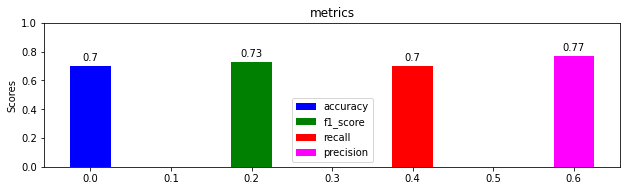

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Fasttext Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(fasttext_arabic_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_ft=Model(inp,out)

mcp_save = ModelCheckpoint('model_fasttext.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_ft.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 46, 300)      4587000     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 46, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 46, 300)      406800      ['spatial_dropout1d[0][0]']  

In [ ]:
model_ft.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
52/52 [==============================] - 7s 64ms/step - loss: 0.8832 - f1: 0.3739 - val_loss: 0.7056 - val_f1: 0.6323
Epoch 2/20
52/52 [==============================] - 2s 42ms/step - loss: 0.5161 - f1: 0.7787 - val_loss: 0.6348 - val_f1: 0.7261
Epoch 3/20
52/52 [==============================] - 2s 41ms/step - loss: 0.2073 - f1: 0.9267 - val_loss: 0.7555 - val_f1: 0.7187
Epoch 4/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0913 - f1: 0.9714 - val_loss: 0.9154 - val_f1: 0.7277
Epoch 5/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0515 - f1: 0.9846 - val_loss: 1.0145 - val_f1: 0.7129
Epoch 6/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0343 - f1: 0.9914 - val_loss: 1.1368 - val_f1: 0.7097
Epoch 7/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0201 - f1: 0.9936 - val_loss: 1.2735 - val_f1: 0.7153
Epoch 8/20
52/52 [==============================] - 2s 42ms/step - loss: 0.0182 - f1: 0.9950 - va

In [ ]:
print(model_ft.evaluate(X_test_pad, y_test))

29/29 [==============================] - 0s 10ms/step - loss: 0.8600 - f1: 0.7175
[0.8599845170974731, 0.7175134420394897]


In [ ]:
y_pred_ft = model_ft.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_ft = (y_pred_ft > 0.5)

print(classification_report(y_test, y_pred_ft, target_names=(['Hate','Normal','Abusive'])))


8/8 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

        Hate       0.64      0.65      0.65       176
      Normal       0.77      0.75      0.76       445
     Abusive       0.71      0.69      0.70       299

   micro avg       0.72      0.71      0.72       920
   macro avg       0.71      0.70      0.70       920
weighted avg       0.73      0.71      0.72       920
 samples avg       0.71      0.71      0.71       920



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_ft = metrics.accuracy_score(y_test, y_pred_ft), metrics.f1_score(y_test, y_pred_ft, average='weighted'), metrics.recall_score(y_test, y_pred_ft, average='weighted'), metrics.precision_score(y_test, y_pred_ft, average='weighted')

(0.0, 1.0)

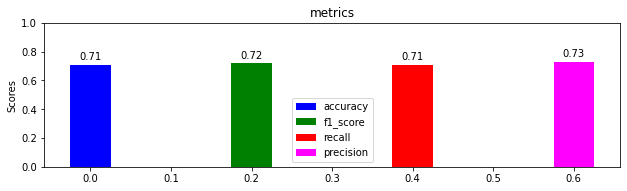

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_ft[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_ft[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_ft[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_ft[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Aravec Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(aravec_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_arav=Model(inp,out)

mcp_save = ModelCheckpoint('model_aravec.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_arav.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_arav.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 46, 300)      4587000     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 46, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 46, 300)      406800      ['spatial_dropout1d[0][0]']  

In [ ]:
model_arav.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
52/52 [==============================] - 7s 65ms/step - loss: 0.8330 - f1: 0.5207 - val_loss: 0.7796 - val_f1: 0.5826
Epoch 2/20
52/52 [==============================] - 2s 42ms/step - loss: 0.7314 - f1: 0.5899 - val_loss: 0.7136 - val_f1: 0.6444
Epoch 3/20
52/52 [==============================] - 2s 42ms/step - loss: 0.5408 - f1: 0.7601 - val_loss: 0.6203 - val_f1: 0.7400
Epoch 4/20
52/52 [==============================] - 2s 41ms/step - loss: 0.2821 - f1: 0.8950 - val_loss: 0.8082 - val_f1: 0.7012
Epoch 5/20
52/52 [==============================] - 2s 41ms/step - loss: 0.1172 - f1: 0.9576 - val_loss: 0.8438 - val_f1: 0.7229
Epoch 6/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0764 - f1: 0.9757 - val_loss: 1.0067 - val_f1: 0.7230
Epoch 7/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0457 - f1: 0.9835 - val_loss: 1.1296 - val_f1: 0.7285
Epoch 8/20
52/52 [==============================] - 2s 41ms/step - loss: 0.0350 - f1: 0.9890 - va

In [ ]:
print(model_arav.evaluate(X_test_pad, y_test))

29/29 [==============================] - 0s 11ms/step - loss: 0.6006 - f1: 0.7399
[0.6006153225898743, 0.7398679852485657]


In [ ]:
y_pred_arav = model_arav.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_arav = (y_pred_arav > 0.5)

print(classification_report(y_test, y_pred_arav, target_names=(['Hate','Normal','Abusive'])))


8/8 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

        Hate       0.68      0.68      0.68       176
      Normal       0.83      0.72      0.77       445
     Abusive       0.78      0.71      0.74       299

   micro avg       0.78      0.71      0.74       920
   macro avg       0.76      0.70      0.73       920
weighted avg       0.78      0.71      0.74       920
 samples avg       0.71      0.71      0.71       920



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_arav = metrics.accuracy_score(y_test, y_pred_arav), metrics.f1_score(y_test, y_pred_arav, average='weighted'), metrics.recall_score(y_test, y_pred_arav, average='weighted'), metrics.precision_score(y_test, y_pred_arav, average='weighted')

(0.0, 1.0)

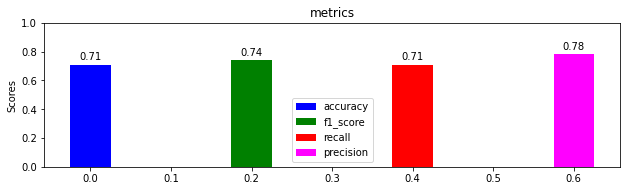

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_arav[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_arav[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_arav[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_arav[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Comparing the three results

In [ ]:
Data = [('Fasttext',) + metric_ft  ,
        ('AraVec',)+ metric_arav ,
         ('Fasttext + AraVec',)+ metric ]

In [ ]:
Results = pd.DataFrame(data =  Data , columns=['Embedding','Accuracy','F1_score','Recall','Precision'])

In [ ]:
Results

,Embedding,Accuracy,F1_score,Recall,Precision
0,Fasttext,0.710870,0.717803,0.710870,0.725014
1,AraVec,0.707609,0.743567,0.707609,0.784336
2,Fasttext + AraVec,0.697826,0.728958,0.697826,0.769579
